In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
path = "../../results/halos_disk.npy"
matches = np.load(path, allow_pickle=True)

# Convertir a DataFrame
df = pd.DataFrame(list(matches))    

In [3]:
path = "../../results/halos_nodisk.npy"
matches2 = np.load(path, allow_pickle=True)

In [4]:
df.head()

,subhalo_TNG50-1,halo_TNG50-1,pos_TNG50-1,Mvir_TNG50-1,halo_TNG50-3,pos_TNG50-3,Mvir_TNG50-3,Rvir_TNG50-3,dist,cost
0,117251,3,"[15550.40625, 29353.3515625, 25992.46875]",3470.526367,3,"[15544.708984375, 29365.369140625, 26009.56835...",3491.555176,664.569702,21.662817,0.03322
1,117254,3,"[15550.40625, 29353.3515625, 25992.46875]",3470.526367,3,"[15544.708984375, 29365.369140625, 26009.56835...",3491.555176,664.569702,21.662817,0.03322
2,117255,3,"[15550.40625, 29353.3515625, 25992.46875]",3470.526367,3,"[15544.708984375, 29365.369140625, 26009.56835...",3491.555176,664.569702,21.662817,0.03322
3,117256,3,"[15550.40625, 29353.3515625, 25992.46875]",3470.526367,3,"[15544.708984375, 29365.369140625, 26009.56835...",3491.555176,664.569702,21.662817,0.03322
4,117257,3,"[15550.40625, 29353.3515625, 25992.46875]",3470.526367,3,"[15544.708984375, 29365.369140625, 26009.56835...",3491.555176,664.569702,21.662817,0.03322


In [5]:
# Convertir a DataFrame
df2 = pd.DataFrame(list(matches2))


In [6]:
df2.head()
len(df2)

10246904

In [7]:
#ver si hay algun duplicado en la columna halo_TNG50-3
df2['halo_TNG50-3'].duplicated().any()

#imprimir los indices de los halos duplicados en la columna halo_TNG50-3 y el numero de veces que se repite cada uno
duplicados = df2['halo_TNG50-3'][df2['halo_TNG50-3'].duplicated(keep=False)]
print(duplicados.value_counts())

halo_TNG50-3
25554.0    4
92090.0    4
83254.0    4
27368.0    4
30763.0    4
          ..
91098.0    2
52226.0    2
38333.0    2
38101.0    2
36996.0    2
Name: count, Length: 5540, dtype: int64


In [8]:
df2.head()

,subhalo_TNG50-1,halo_TNG50-1,pos_TNG50-1,Mvir_TNG50-1,halo_TNG50-3,pos_TNG50-3,Mvir_TNG50-3,Rvir_TNG50-3,dist,cost,Rvir_TNG50-1
0,None,108,"[14095.9482421875, 17054.509765625, 6683.28417...",137.709534,110.0,"[14095.41015625, 17050.73828125, 6679.39306640...",150.099564,232.802856,5.445333,0.093137,NaN
1,None,109,"[17865.07421875, 4387.8544921875, 8134.6147460...",165.795670,116.0,"[17863.009765625, 4384.458984375, 8125.3149414...",164.794830,240.169662,10.113819,0.042459,NaN
2,None,110,"[5334.287109375, 30552.8671875, 23117.240234375]",169.659134,119.0,"[5340.58984375, 30535.728515625, 23125.9921875]",173.156784,244.164124,20.249821,0.086011,NaN
3,None,111,"[15894.541015625, 3687.450927734375, 32451.355...",194.144821,19139.0,"[15878.5244140625, 3834.576171875, 32683.41015...",0.511241,35.027966,275.230164,1.473819,NaN
4,None,112,"[3120.57763671875, 26364.171875, 23625.01171875]",141.648865,121.0,"[3126.225830078125, 26371.5234375, 23627.84765...",142.050430,228.562057,9.694991,0.042551,NaN


No hay duplicados en este dataframe en TNG50-1 (se buscaron directamente los halos fof y no los subhalos como en el anterior)

In [9]:
#filtrar por halos con masa mayor a 1 en TNG50-1
df = df[df['Mvir_TNG50-1'] > 0]
#filtrar por halos con masa mayor a 1 en TNG50-1
df2 = df2[df2['Mvir_TNG50-1'] > 0]

#filtrar por halos con masa mayor a 1 en TNG50-3
df = df[df['Mvir_TNG50-3'] > 0]
#filtrar por halos con masa mayor a 1 en TNG50-3
df2 = df2[df2['Mvir_TNG50-3'] > 0]


In [10]:
#juntar los dos dataframes
df_combined = pd.concat([df, df2])
#solo graficar la masa de halos unicos en TNG50-1 (es decir que no se repitan los halos con mismo id)

df_noduplicates = df_combined.copy()
df_noduplicates = df_noduplicates.drop_duplicates(subset=['halo_TNG50-1'])

In [11]:
#imprimir los indices duplicados en el dataframe combinado en TNG50-3 y el numero de veces que se repite cada uno
duplicados_combined = df_noduplicates['halo_TNG50-3'][df_noduplicates['halo_TNG50-3'].duplicated(keep=False)]
print(duplicados_combined.value_counts())

halo_TNG50-3
20145.0    4
74632.0    4
27368.0    4
30763.0    4
83254.0    4
          ..
38333.0    2
38101.0    2
57663.0    2
52314.0    2
42992.0    2
Name: count, Length: 5542, dtype: int64


/home/andres/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/andres/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


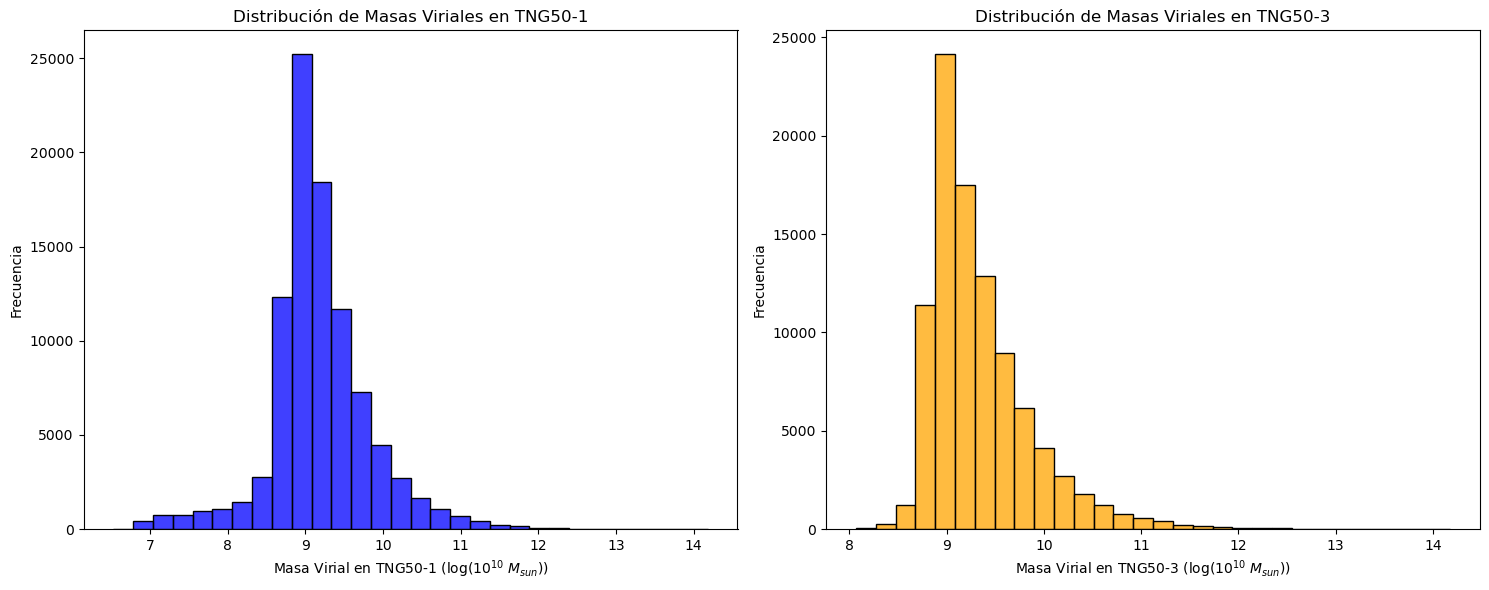

In [12]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Graficar histograma de la columna Mvir_TNG50-1
sns.histplot(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), bins=30,
                ax=axs[0], color='blue')
axs[0].set_xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribución de Masas Viriales en TNG50-1')

# Graficar histograma de la columna Mvir_TNG50-3
sns.histplot(np.log10(df_noduplicates['Mvir_TNG50-3']*10**10), bins=30,
                ax=axs[1], color='orange')
axs[1].set_xlabel('Masa Virial en TNG50-3 (log($10^{10}$ $M_{sun}$))')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Distribución de Masas Viriales en TNG50-3')
plt.tight_layout()
plt.show()

In [13]:
df_combined.columns

Index(['subhalo_TNG50-1', 'halo_TNG50-1', 'pos_TNG50-1', 'Mvir_TNG50-1',
       'halo_TNG50-3', 'pos_TNG50-3', 'Mvir_TNG50-3', 'Rvir_TNG50-3', 'dist',
       'cost', 'Rvir_TNG50-1'],
      dtype='object')

In [14]:
#delta x y z como funcion de la masa del halo y la distancia como funcion de la masa del halo

df_noduplicates['x_TNG50-1'] = df_noduplicates['pos_TNG50-1'].apply(lambda pos: pos[0])
df_noduplicates['y_TNG50-1'] = df_noduplicates['pos_TNG50-1'].apply(lambda pos: pos[1])
df_noduplicates['z_TNG50-1'] = df_noduplicates['pos_TNG50-1'].apply(lambda pos: pos[2])
df_noduplicates['x_TNG50-3'] = df_noduplicates['pos_TNG50-3'].apply(lambda pos: pos[0])
df_noduplicates['y_TNG50-3'] = df_noduplicates['pos_TNG50-3'].apply(lambda pos: pos[1])
df_noduplicates['z_TNG50-3'] = df_noduplicates['pos_TNG50-3'].apply(lambda pos: pos[2])


df_noduplicates['x_diff'] = df_noduplicates['x_TNG50-1'] - df_noduplicates['x_TNG50-3']
df_noduplicates['y_diff'] = df_noduplicates['y_TNG50-1'] - df_noduplicates['y_TNG50-3']
df_noduplicates['z_diff'] = df_noduplicates['z_TNG50-1'] - df_noduplicates['z_TNG50-3']

#distancia periodica en x, y, z
box_size = 35000
df_noduplicates['x_diff'] = df_noduplicates['x_diff'].apply(lambda x: x - box_size if x > box_size/2 else (x + box_size if x < -box_size/2 else x))
df_noduplicates['y_diff'] = df_noduplicates['y_diff'].apply(lambda y: y - box_size if y > box_size/2 else (y + box_size if y < -box_size/2 else y))
df_noduplicates['z_diff'] = df_noduplicates['z_diff'].apply(lambda z: z - box_size if z > box_size/2 else (z + box_size if z < -box_size/2 else z))


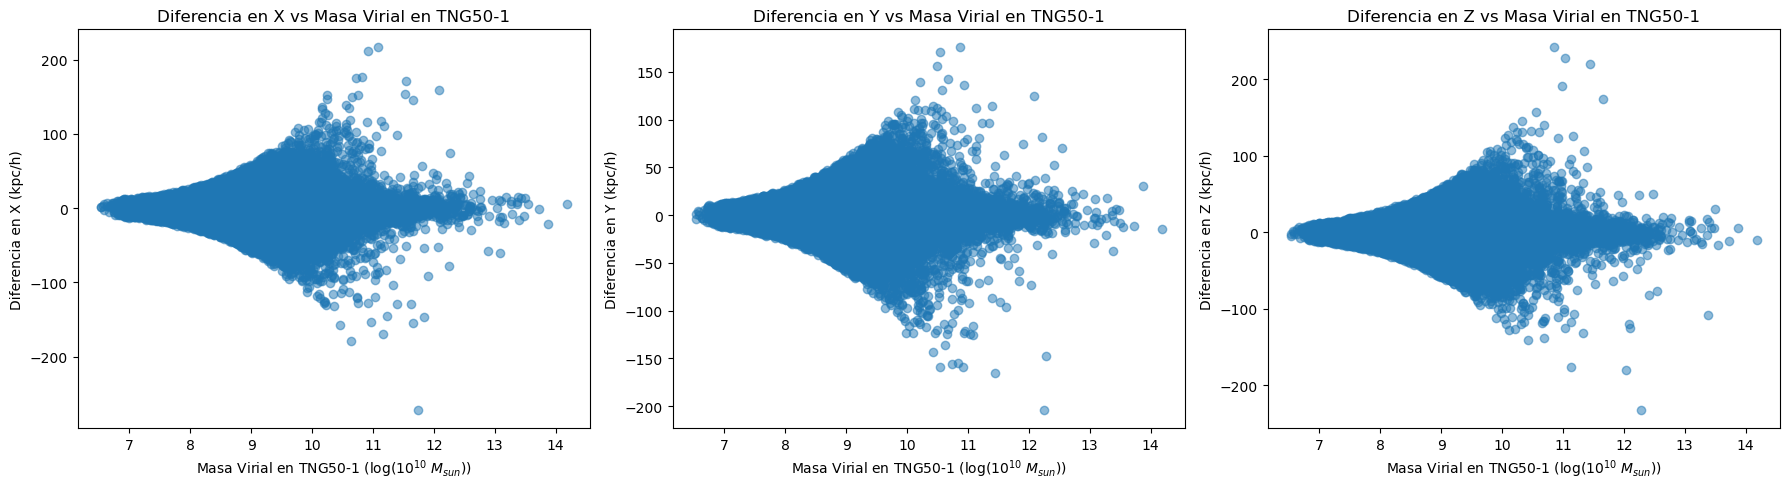

In [15]:
#graficar delta x, y, z como funcion de la masa del halo en TNG50-1
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), df_noduplicates['x_diff'], alpha=0.5)
plt.xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
plt.ylabel('Diferencia en X (kpc/h)')
plt.title('Diferencia en X vs Masa Virial en TNG50-1')
plt.subplot(1,3,2)
plt.scatter(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), df_noduplicates['y_diff'], alpha=0.5)
plt.xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
plt.ylabel('Diferencia en Y (kpc/h)')
plt.title('Diferencia en Y vs Masa Virial en TNG50-1')
plt.subplot(1,3,3)
plt.scatter(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), df_noduplicates['z_diff'], alpha=0.5)
plt.xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
plt.ylabel('Diferencia en Z (kpc/h)')
plt.title('Diferencia en Z vs Masa Virial en TNG50-1')
plt.tight_layout()
plt.show()

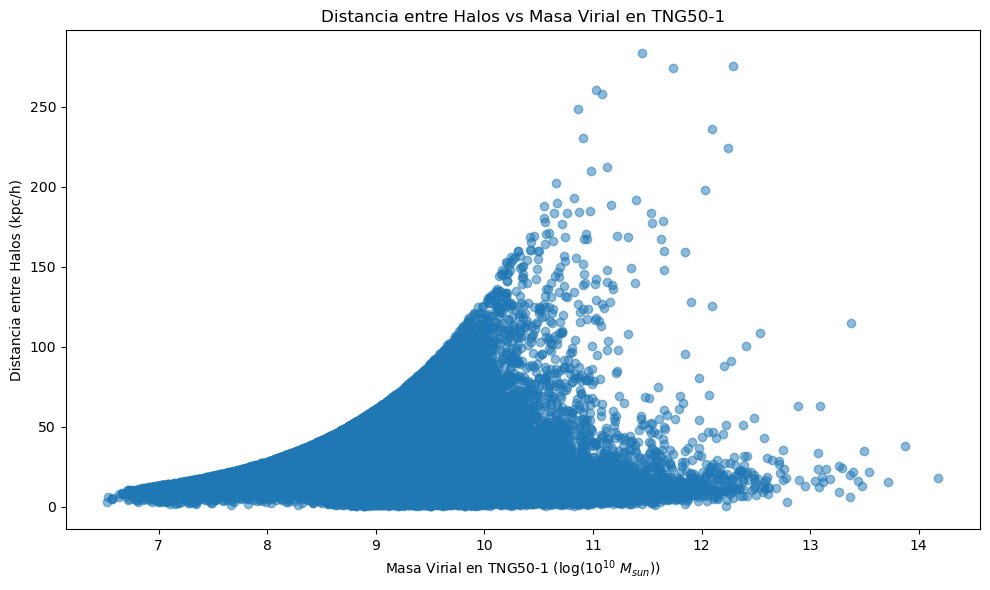

In [16]:
#grafica distancia (dist) entre halos como funcion de la masa del halo en TNG50-1
plt.figure(figsize=(10,6))
plt.scatter(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), df_noduplicates['dist'], alpha=0.5)
plt.xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
plt.ylabel('Distancia entre Halos (kpc/h)')
plt.title('Distancia entre Halos vs Masa Virial en TNG50-1')
plt.tight_layout()
plt.show()

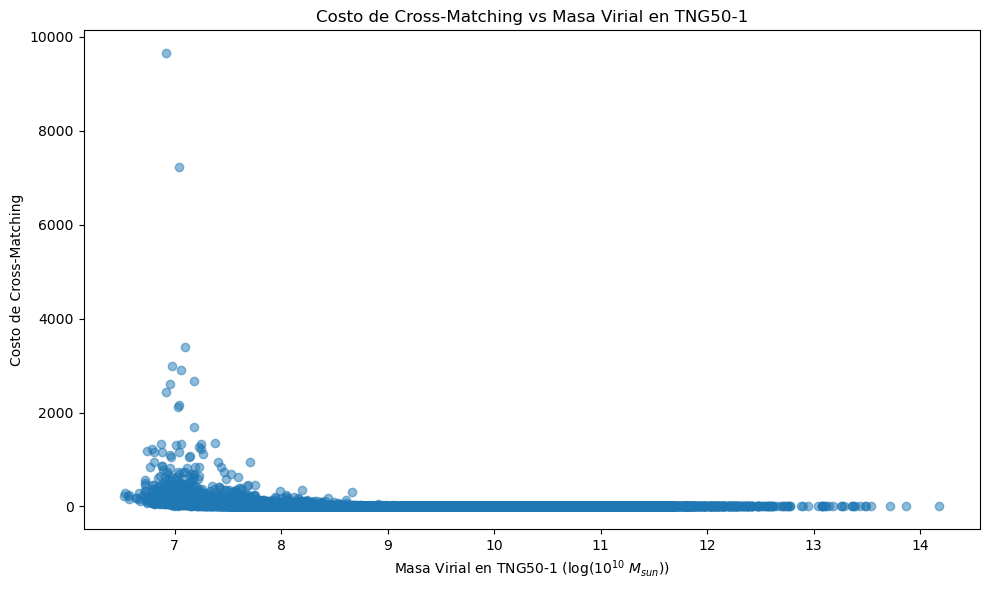

In [17]:
#grafica de costo como funcion de la masa del halo en TNG50-1
plt.figure(figsize=(10,6))
plt.scatter(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), df_noduplicates['cost'], alpha=0.5)
plt.xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
plt.ylabel('Costo de Cross-Matching')
plt.title('Costo de Cross-Matching vs Masa Virial en TNG50-1')
plt.tight_layout()
plt.show()

In [18]:
df_noduplicates.head()

,subhalo_TNG50-1,halo_TNG50-1,pos_TNG50-1,Mvir_TNG50-1,halo_TNG50-3,pos_TNG50-3,Mvir_TNG50-3,Rvir_TNG50-3,dist,cost,Rvir_TNG50-1,x_TNG50-1,y_TNG50-1,z_TNG50-1,x_TNG50-3,y_TNG50-3,z_TNG50-3,x_diff,y_diff,z_diff
0,117251,3,"[15550.40625, 29353.3515625, 25992.46875]",3470.526367,3.0,"[15544.708984375, 29365.369140625, 26009.56835...",3491.555176,664.569702,21.662817,0.033220,NaN,15550.406250,29353.351562,25992.468750,15544.708984,29365.369141,26009.568359,5.697266,-12.017578,-17.099609
18,11,0,"[7307.24072265625, 24550.361328125, 21302.5800...",15167.142578,0.0,"[7301.20263671875, 24564.564453125, 21312.1992...",15079.097656,1082.225708,18.185898,0.017748,NaN,7307.240723,24550.361328,21302.580078,7301.202637,24564.564453,21312.199219,6.038086,-14.203125,-9.619141
19,143881,4,"[20941.12890625, 5159.5205078125, 31087.658203...",3142.989746,4.0,"[20926.93359375, 5167.427734375, 31056.8125]",3239.478027,648.165588,34.863636,0.062408,NaN,20941.128906,5159.520508,31087.658203,20926.933594,5167.427734,31056.812500,14.195312,-7.907227,30.845703
34,167393,5,"[17406.791015625, 279.4239196777344, 29274.085...",1859.250610,5.0,"[17397.677734375, 299.9371643066406, 29286.548...",1816.254150,534.463318,25.674623,0.052979,NaN,17406.791016,279.423920,29274.085938,17397.677734,299.937164,29286.548828,9.113281,-20.513245,-12.462891
42,184932,6,"[23898.9296875, 4835.14892578125, 5756.51953125]",3027.909180,6.0,"[23909.30859375, 4830.07373046875, 5750.578125]",3017.573486,633.013000,12.991139,0.020782,NaN,23898.929688,4835.148926,5756.519531,23909.308594,4830.073730,5750.578125,-10.378906,5.075195,5.941406


In [19]:
#tomar solo un rango de masas entre la masa minima y maxima de df (halos con disco)
df_filtered = df_combined.copy()
df_filtered = df_filtered[(df_filtered['Mvir_TNG50-1'] >= df['Mvir_TNG50-1'].min()) & (df_filtered['Mvir_TNG50-1'] < df['Mvir_TNG50-1'].max())].reset_index(drop=True)

len(df_filtered)

429

In [20]:
print(df['Mvir_TNG50-1'].min(), df['Mvir_TNG50-1'].max())

107.66678619384766 15167.142578125


## Aca está el filtro de masas de los halos sin disco 

In [21]:
len(df2[(df2['Mvir_TNG50-1'] >= df['Mvir_TNG50-1'].min()) & (df2['Mvir_TNG50-1'] < df['Mvir_TNG50-1'].max())])

60

In [22]:
#añadir una columna que indique si el halo tiene disco o no
df_filtered['has_disk'] = df_filtered['halo_TNG50-1'].isin(df['halo_TNG50-1']).astype(int)
df_filtered['has_disk'].value_counts()

has_disk
1    369
0     60
Name: count, dtype: int64

In [23]:
len(df_combined)

95103

In [24]:
len(df)

377

In [25]:
df_filtered.head()

,subhalo_TNG50-1,halo_TNG50-1,pos_TNG50-1,Mvir_TNG50-1,halo_TNG50-3,pos_TNG50-3,Mvir_TNG50-3,Rvir_TNG50-3,dist,cost,Rvir_TNG50-1,has_disk
0,117251,3,"[15550.40625, 29353.3515625, 25992.46875]",3470.526367,3.0,"[15544.708984375, 29365.369140625, 26009.56835...",3491.555176,664.569702,21.662817,0.03322,NaN,1
1,117254,3,"[15550.40625, 29353.3515625, 25992.46875]",3470.526367,3.0,"[15544.708984375, 29365.369140625, 26009.56835...",3491.555176,664.569702,21.662817,0.03322,NaN,1
2,117255,3,"[15550.40625, 29353.3515625, 25992.46875]",3470.526367,3.0,"[15544.708984375, 29365.369140625, 26009.56835...",3491.555176,664.569702,21.662817,0.03322,NaN,1
3,117256,3,"[15550.40625, 29353.3515625, 25992.46875]",3470.526367,3.0,"[15544.708984375, 29365.369140625, 26009.56835...",3491.555176,664.569702,21.662817,0.03322,NaN,1
4,117257,3,"[15550.40625, 29353.3515625, 25992.46875]",3470.526367,3.0,"[15544.708984375, 29365.369140625, 26009.56835...",3491.555176,664.569702,21.662817,0.03322,NaN,1


In [26]:
df_test = df_filtered.copy()
df_test = df_test.drop(columns=['pos_TNG50-1', 'pos_TNG50-3', 'dist', 'cost','Rvir_TNG50-1', 'Rvir_TNG50-3'])

df_test.head()

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-3,Mvir_TNG50-3,has_disk
0,117251,3,3470.526367,3.0,3491.555176,1
1,117254,3,3470.526367,3.0,3491.555176,1
2,117255,3,3470.526367,3.0,3491.555176,1
3,117256,3,3470.526367,3.0,3491.555176,1
4,117257,3,3470.526367,3.0,3491.555176,1


In [27]:
df_test_noduplicates = df_test.drop_duplicates(subset=['halo_TNG50-1'])

df_test_noduplicates['has_disk'].value_counts() 

has_disk
1    107
0     60
Name: count, dtype: int64

In [28]:
#imprimir indices de los duplicados en TNG50-3 en el dataframe df_test_noduplicates
df_test_noduplicates['halo_TNG50-3'].duplicated().any()

False

In [29]:
#escribir un archivo csv con el dataframe df_test_noduplicates
df_test_noduplicates.to_csv('../../results/halos_matched_disk_noduplicates.csv', index=False)